In [1]:
import pandas as pd
import os
import numpy as np
import sqlite3
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
tweets_df = pd.read_pickle(r'C:\Users\20232788\Desktop\DBL-1\complete_sentences_emb\tweets_df2.pkl')

In [3]:
conn = sqlite3.connect(r"C:\Users\20232788\Downloads\tweets4.db")
cursor = conn.cursor()

In [44]:
with open(r'C:\Users\20232788\PycharmProjects\DBL-Challenge-JBG000-Final\our_label_dict.json', 'r') as f:
    our_label_dict = json.load(f)

id_str_values = tuple(our_label_dict.keys())
query = f"SELECT id_str, sent_label FROM tweets WHERE id_str IN {id_str_values}"
tweets_df = pd.read_sql_query(query, conn)

our_label_df = pd.DataFrame(list(our_label_dict.items()), columns=['id_str', 'our_label'])

sent_df = pd.merge(tweets_df, our_label_df, on='id_str')

Precision: 0.6064177215189873
Recall: 0.605
F1 Score: 0.605366739288308
Accuracy: 0.605


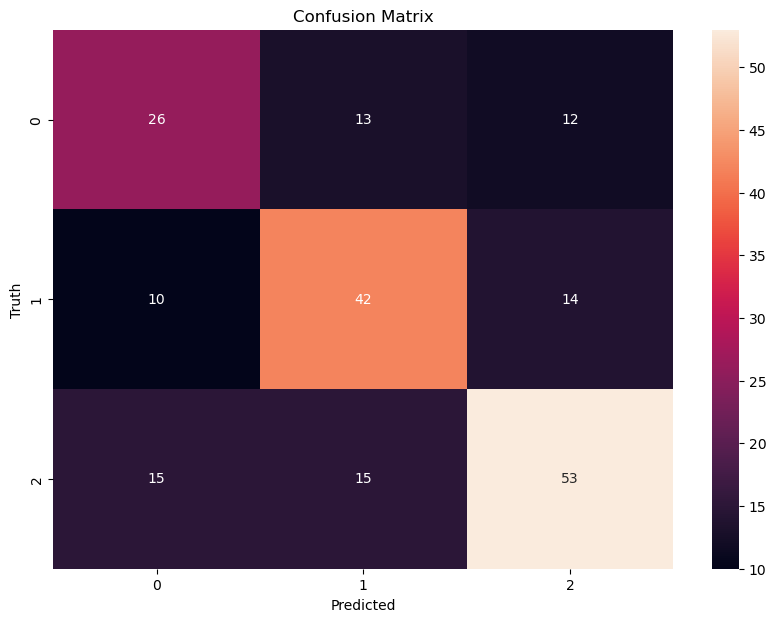

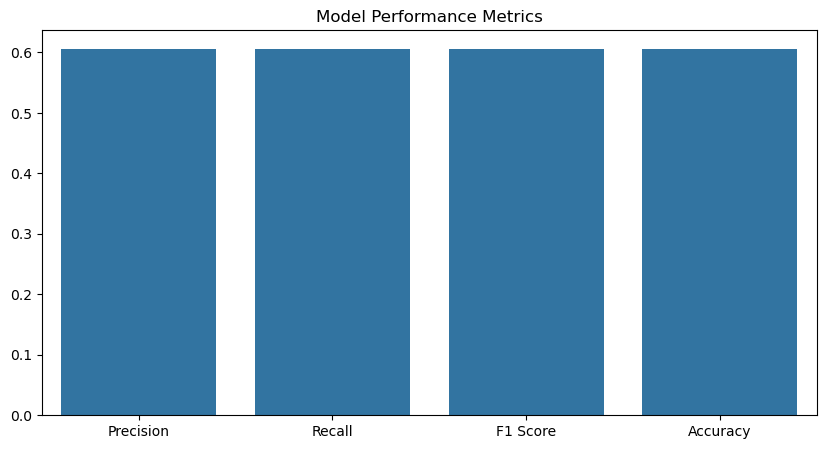

In [45]:
# Calculate metrics
precision = precision_score(sent_df['our_label'], sent_df['sent_label'], average='weighted')
recall = recall_score(sent_df['our_label'], sent_df['sent_label'], average='weighted')
f1 = f1_score(sent_df['our_label'], sent_df['sent_label'], average='weighted')
accuracy = accuracy_score(sent_df['our_label'], sent_df['sent_label'])

# Compute confusion matrix
conf_matrix = confusion_matrix(sent_df['our_label'], sent_df['sent_label'])

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# Visualize metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10,5))
sns.barplot(x=metrics, y=values)
plt.title('Model Performance Metrics')
plt.show()

In [81]:
with open(r'C:\Users\20232788\PycharmProjects\DBL-Challenge-JBG000-Final\our_topic_dict.json', 'r') as f:
    our_topic_dict = json.load(f)

# for the rows that have id_str values that are present in the dictionary
id_str_values = tuple(our_topic_dict.keys())
query = f"SELECT id_str, topic FROM tweets WHERE id_str IN {id_str_values}"
tweets_df = pd.read_sql_query(query, conn)

# Create a new DataFrame with the our_label column
our_topic_df = pd.DataFrame(list(our_topic_dict.items()), columns=['id_str', 'our_topic'])

# Merge the two DataFrames on the id_str column
topic_df = pd.merge(tweets_df, our_topic_df, on='id_str')

Precision: 0.6370020937787543
Recall: 0.6
F1 Score: 0.5211019988626339
Accuracy: 0.6


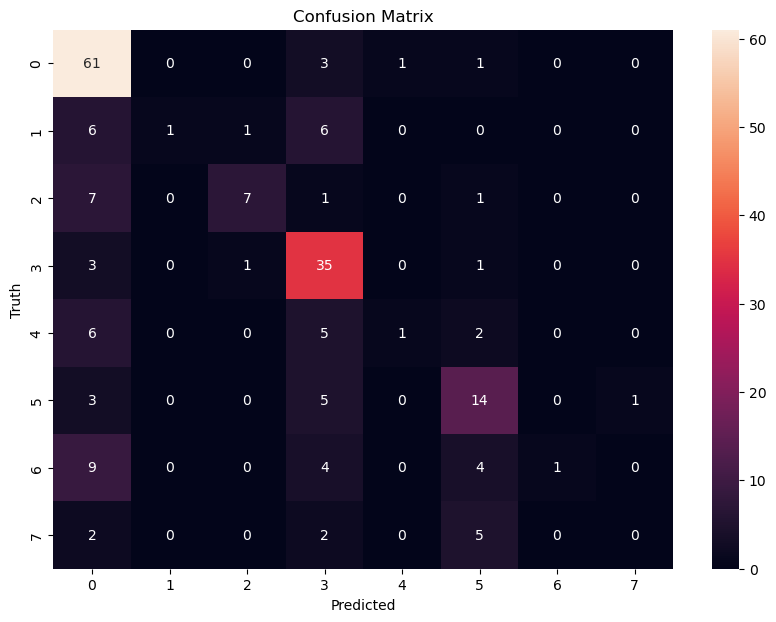

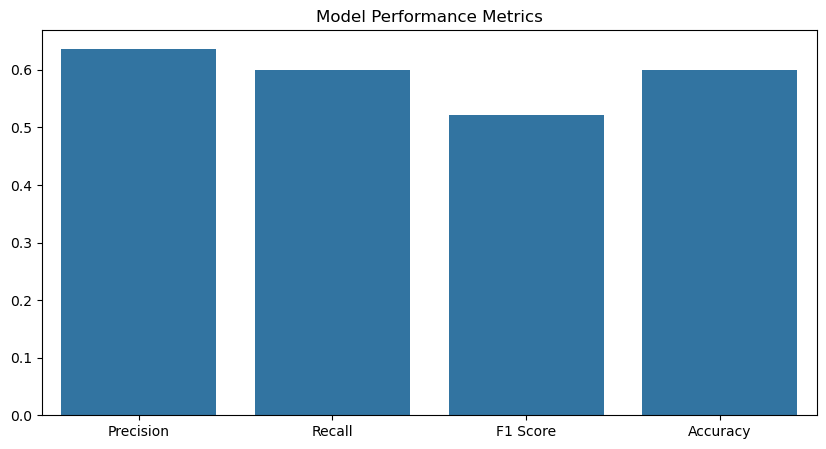

In [82]:
# Calculate metrics
precision = precision_score(topic_df['our_topic'], topic_df['topic'], average='weighted')
recall = recall_score(topic_df['our_topic'], topic_df['topic'], average='weighted')
f1 = f1_score(topic_df['our_topic'], topic_df['topic'], average='weighted')
accuracy = accuracy_score(topic_df['our_topic'], topic_df['topic'])

# Compute confusion matrix
conf_matrix = confusion_matrix(topic_df['our_topic'], topic_df['topic'])

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# Visualize metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10,5))
sns.barplot(x=metrics, y=values)
plt.title('Model Performance Metrics')
plt.show()